# Use Clustering Techniques for the any customer dataset

## Import libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

In [2]:
dataset=pd.read_csv("C:\mahua\Projects\Internsavy\Mall_Customers.csv")

In [3]:
dataset

,CustomerID,Gender,Age,Annual_Income(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
dataset.shape

(200, 5)

In [5]:
dataset.head()

,CustomerID,Gender,Age,Annual_Income(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
dataset.tail()

,CustomerID,Gender,Age,Annual_Income(k$),Spending_Score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
dataset.describe()

,CustomerID,Age,Annual_Income(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         200 non-null    int64 
 1   Gender             200 non-null    object
 2   Age                200 non-null    int64 
 3   Annual_Income(k$)  200 non-null    int64 
 4   Spending_Score     200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
dataset.isnull().sum()

CustomerID           0
Gender               0
Age                  0
Annual_Income(k$)    0
Spending_Score       0
dtype: int64

#### >> No Null Values

## Data Visualization

### Age-wise distribution

<Axes: xlabel='Age', ylabel='count'>

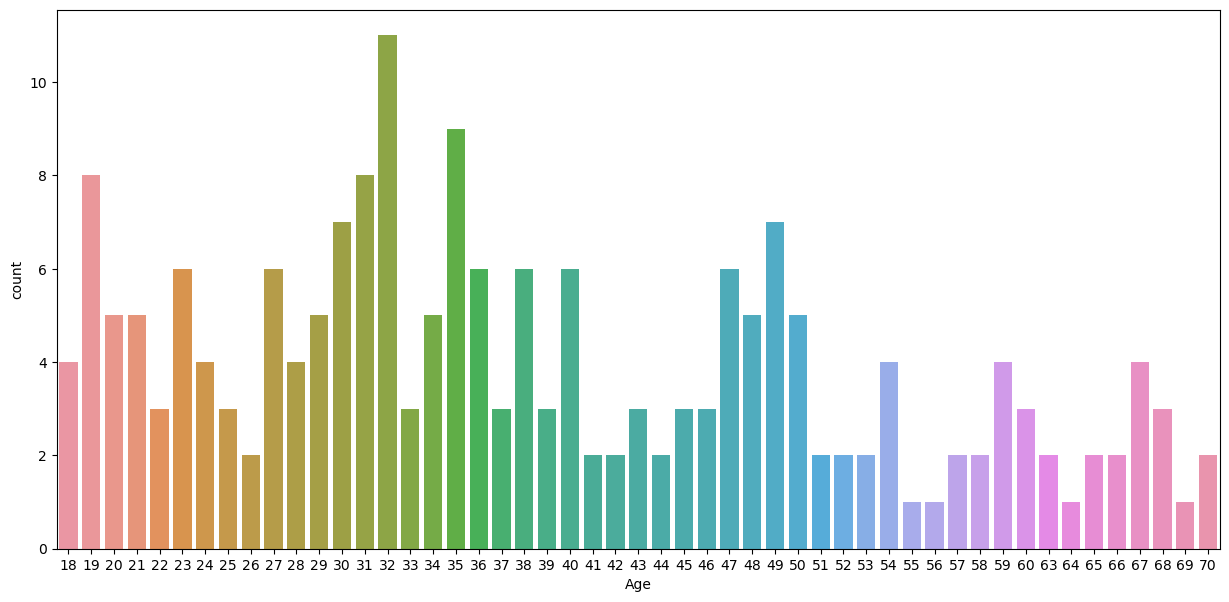

In [10]:
plt.figure(figsize=(15,7))
sns.countplot(data=dataset,x='Age')

#### >> People between 18-70 are customers in this mall

### Gender-wise customer distribution

In [11]:
gender_count=dataset.Gender.value_counts()
gender_count

Female    112
Male       88
Name: Gender, dtype: int64

([<matplotlib.patches.Wedge at 0x19733326f80>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56.0%'),
  Text(0.11242879316591654, -0.5893723495951058, '44.0%')])

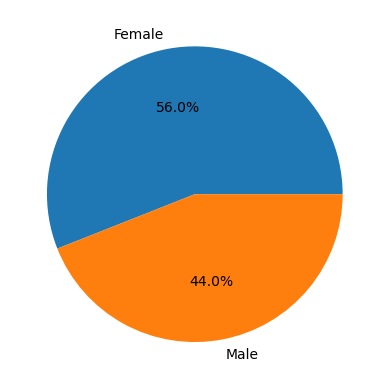

In [12]:
plt.pie(gender_count,labels=['Female','Male'],autopct="%1.1f%%")

#### >> There are more Female customers than Male customers

### Box Plot

<Axes: >

<Figure size 1000x700 with 0 Axes>

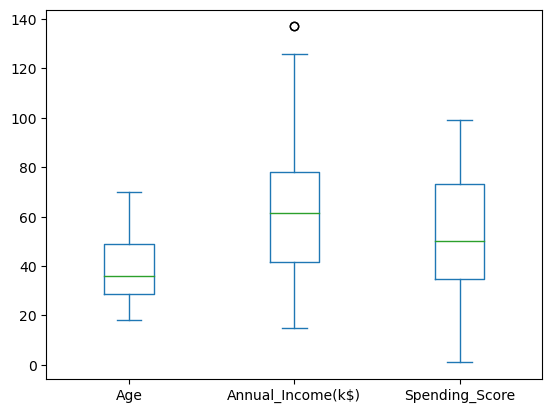

In [13]:
plt.figure(figsize=(10,7))
dataset[['Age','Annual_Income(k$)','Spending_Score']].plot(kind='box')

#### >> The Age ranges from 18 to 70 with median value of 36.0
#### >> The Annual Income of customers ranges from 15k dollars to 137k dollars. The median value being 61.5k dollars.
#### >> The Spending Score of customers ranges from 1 to 99, with a median value of 50.0.

### Spending Score and Annual Income

<Axes: >

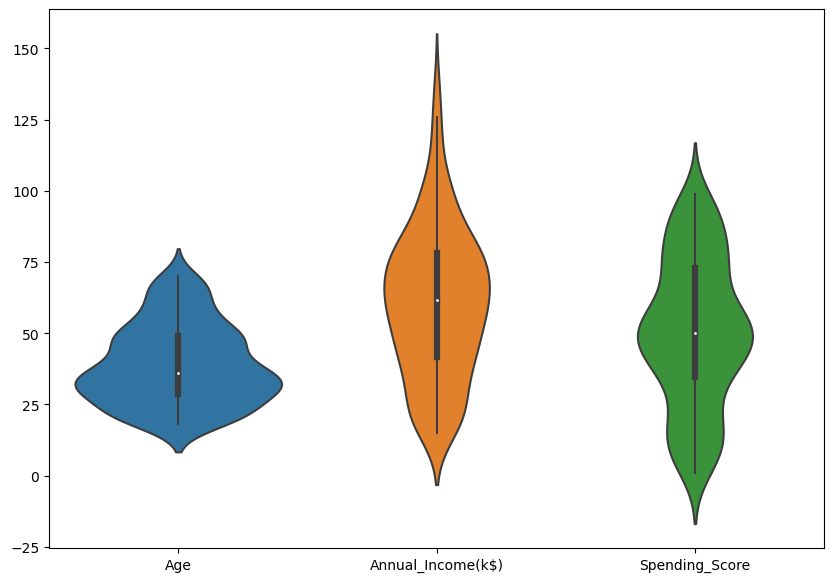

In [14]:
plt.figure(figsize=(10,7))
sns.violinplot(dataset[['Age','Annual_Income(k$)','Spending_Score']])

### Creating column Spending_level to sort the customers into 3 groups (Low,Mid,High) with respect to Spending Score

#### Low = 0, Mid = 1, High = 2

In [15]:
dataset['Spending_level']=pd.cut(dataset['Spending_Score'],bins=[0,40,70,100],labels=['0','1','2'])

In [16]:
dataset.isnull().any()

CustomerID           False
Gender               False
Age                  False
Annual_Income(k$)    False
Spending_Score       False
Spending_level       False
dtype: bool

In [17]:
dataset

,CustomerID,Gender,Age,Annual_Income(k$),Spending_Score,Spending_level
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [18]:
dataset.Spending_level.value_counts()

1    83
0    63
2    54
Name: Spending_level, dtype: int64

<Axes: xlabel='Spending_level', ylabel='count'>

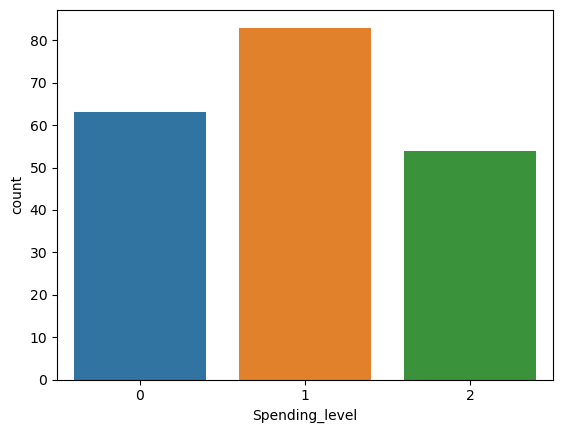

In [19]:
sns.countplot(data=dataset,x='Spending_level')

#### >> Majority customers belong to Mid Spending level. Least customers fall under High Spending Level. The customers with Low Spending Level are decent in amount.

### Creating column Income_group to sort the customers into 3 groups (Low,Mid,High) with respect to their Annual Income (k$)

#### Low = 0, Mid = 1, High = 2

In [20]:
dataset['Income_group']=pd.cut(dataset['Annual_Income(k$)'],bins=[0,25,75,200],labels=['0','1','2'])

In [21]:
dataset.isnull().any()

CustomerID           False
Gender               False
Age                  False
Annual_Income(k$)    False
Spending_Score       False
Spending_level       False
Income_group         False
dtype: bool

In [22]:
dataset.Income_group.value_counts()

1    118
2     58
0     24
Name: Income_group, dtype: int64

<Axes: xlabel='Income_group', ylabel='count'>

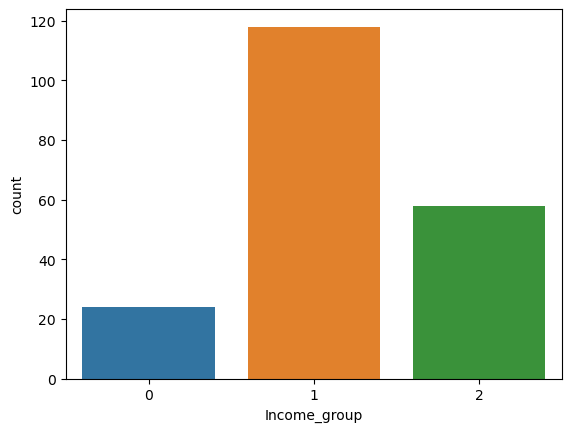

In [23]:
sns.countplot(data=dataset,x='Income_group')

#### >> Majority population belongs to Mid Income group. And fewer belong to Low Income group.

### Spending_level and Income_group

Text(0.5, 1.0, 'Spending Level as per Income Group')

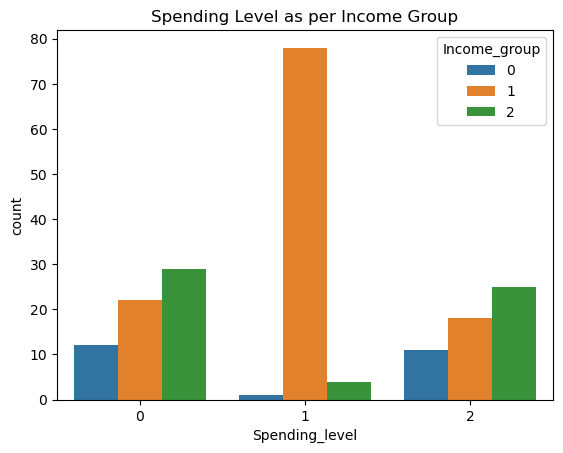

In [24]:
sns.countplot(data=dataset,x='Spending_level',hue='Income_group')
plt.title("Spending Level as per Income Group")

#### >> Spending level is quite unevenly distributed with respect to the Income group

### Combined Plot

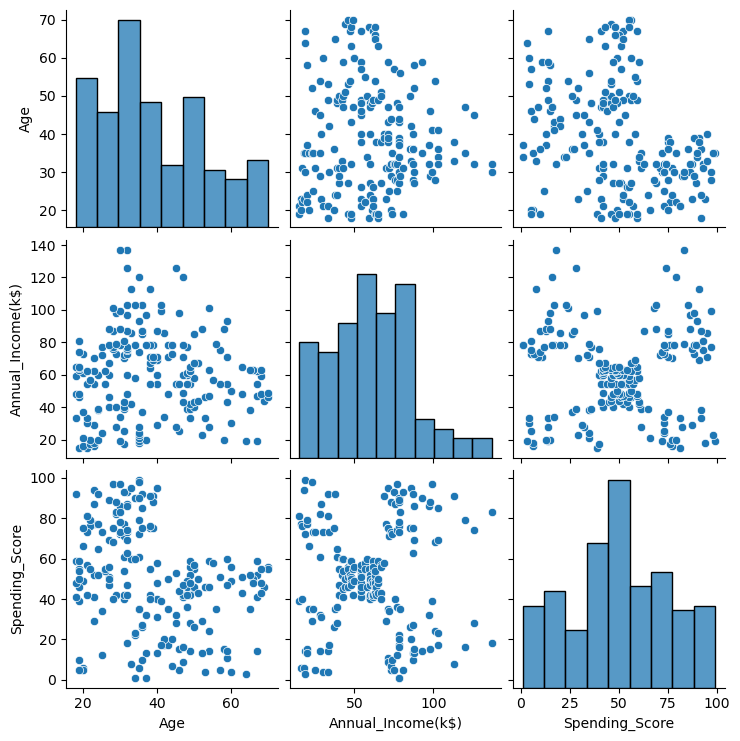

In [25]:
sns.pairplot(dataset[['Age','Annual_Income(k$)','Spending_Score']])

## Data Imputation

### Converting categorical data into numerical data

In [26]:
dataset['Gender'].replace({"Male":1,"Female":2}, inplace = True)
dataset.head()

,CustomerID,Gender,Age,Annual_Income(k$),Spending_Score,Spending_level,Income_group
0,1,1,19,15,39,0,0
1,2,1,21,15,81,2,0
2,3,2,20,16,6,0,0
3,4,2,23,16,77,2,0
4,5,2,31,17,40,0,0


### Dropping Unnecessary columns

In [27]:
dataset.drop(['CustomerID','Spending_level','Income_group'],axis=1,inplace=True)

In [28]:
dataset

,Gender,Age,Annual_Income(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40
...,...,...,...,...
195,2,35,120,79
196,2,45,126,28
197,1,32,126,74
198,1,32,137,18


## K-means Clustering

### Unlike supervised learning, K-Means doesn’t require labeled data. It is used to cluster data points.

In [29]:
sse=[]
n_clusters=range(1,10)
for k in n_clusters:
    cluster=KMeans(n_clusters=k)
    cluster.fit_predict(dataset)
    sse.append(cluster.inertia_)
sse

[308862.06,
 212889.442455243,
 143391.59236035674,
 104434.82333370819,
 75399.61541401484,
 58348.64136331505,
 51474.61821083328,
 44359.634641148325,
 41102.37791958042]

### Using the Elbow method to find the value of 'K'

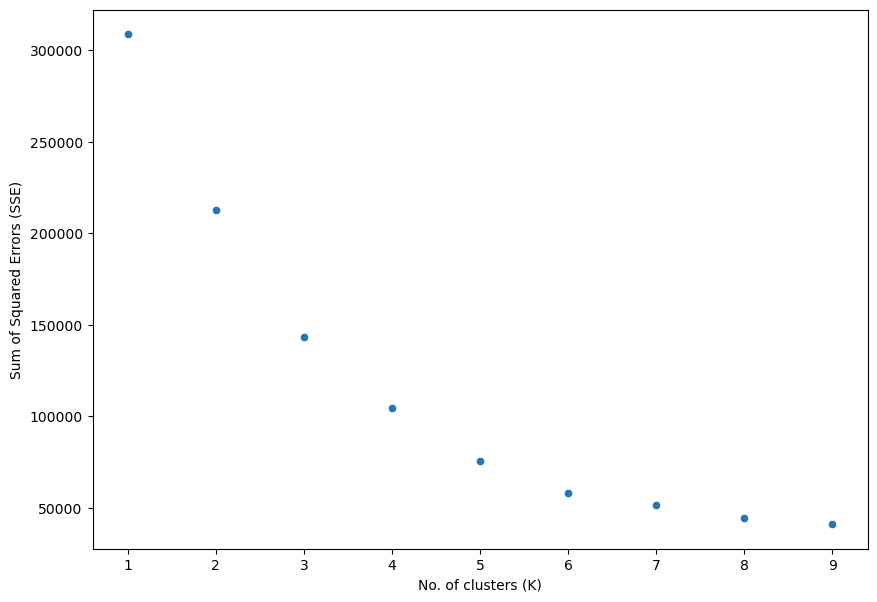

In [30]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=n_clusters,y=sse)
plt.xlabel('No. of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)') 
plt.show()

#### >> Value of K is evident here. The elbow occurs where K is 5. 
#### >> Hence no. of clusters will be 5.

In [31]:
km=KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [32]:
y_pred=km.fit_predict(dataset)
y_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [33]:
dataset['Cluster']=y_pred
dataset

,Gender,Age,Annual_Income(k$),Spending_Score,Cluster
0,1,19,15,39,4
1,1,21,15,81,2
2,2,20,16,6,4
3,2,23,16,77,2
4,2,31,17,40,4
...,...,...,...,...,...
195,2,35,120,79,1
196,2,45,126,28,3
197,1,32,126,74,1
198,1,32,137,18,3


### Centroid points

In [34]:
km.cluster_centers_

array([[ 1.58227848, 43.08860759, 55.29113924, 49.56962025],
       [ 1.53846154, 32.69230769, 86.53846154, 82.12820513],
       [ 1.60869565, 25.52173913, 26.30434783, 78.56521739],
       [ 1.47222222, 40.66666667, 87.75      , 17.58333333],
       [ 1.60869565, 45.2173913 , 26.30434783, 20.91304348]])

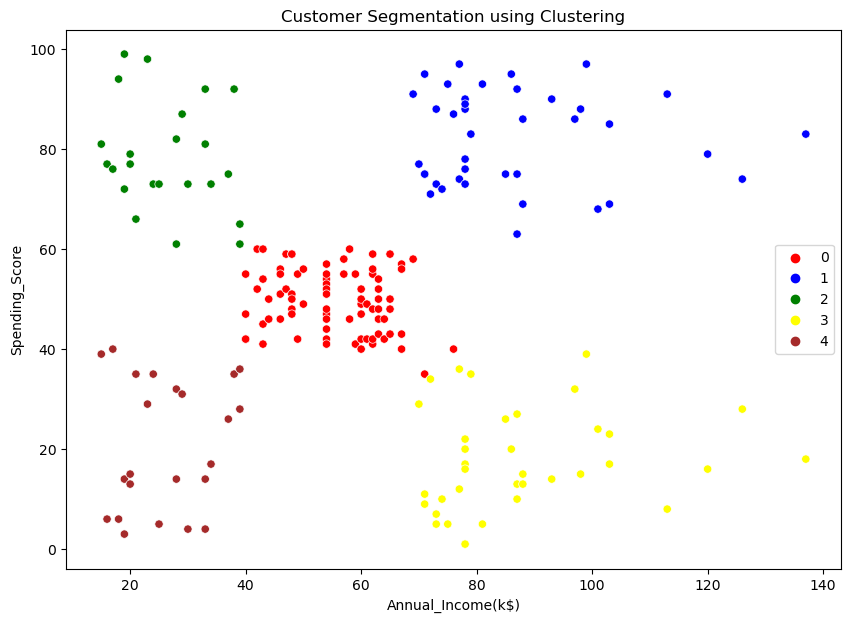

In [35]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Annual_Income(k$)', y='Spending_Score', hue= y_pred, data=dataset, palette=['red','blue','green','yellow','brown'])
plt.title("Customer Segmentation using Clustering")
plt.show()

### Conclusion:
#### >> The brown color distribution shows low income-low spending, meaning people that focus only one essentials
#### >> The yellow color distribution shows high income-low spending, meaning peoplr that have higher income but don't spend on luxuries
#### >> The green color distribution shows low income-high spending, meaning careless shopping
#### >> The blue distribution shows high income- high spending, meaning customers spending on luxuries
#### >> The red distribution shows mid income-mid spending, also the most in number
### >> Hence our target audience is the blue and red grouped customers